In [2]:
import numpy as np
import pandas as pd

In [3]:

MC = 50
nColumns = 11
factor = np.linspace(0,1,nColumns)

In [4]:


CN = 48
Folder = 'deltaTau_angle/'

rmse_vec = np.zeros((nColumns,MC))
tau_los_vec = np.zeros((nColumns,MC))
tau_nLos_vec = np.zeros((nColumns,MC))
tau_los_est_vec = np.zeros((nColumns,MC))
theta_los_vec = np.zeros((nColumns,MC))
theta_nLos_vec = np.zeros((nColumns,MC))

In [5]:
for ii in range(nColumns):
    results = []
    for jj in range(MC):
        iteration = ii
        pars = np.array([CN, iteration, jj]).astype('str')
        file_results = Folder + pars[0] + '_' + pars[1] + '_' + pars[2] + '.pkl'

        results.append(pd.read_pickle(file_results))

    data_concat = pd.concat(results)

    rmse_vec[ii,:]     = data_concat['rmse']
    tau_los_vec[ii,:]  = data_concat['tau_los']
    tau_nLos_vec[ii,:] = data_concat['tau_nlos']
    theta_los_vec[ii,:]  = data_concat['theta_los']
    theta_nLos_vec[ii,:] = data_concat['theta_nlos']
    tau_los_est_vec[ii,:] = data_concat['tau_los_est']

In [6]:
import  matplotlib.pyplot as plt

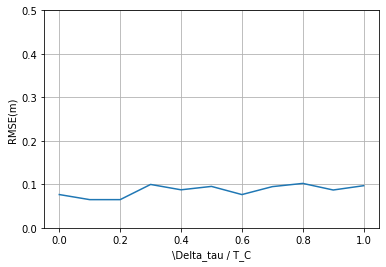

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(figsize=(6, 4))
plt.plot(factor,np.mean(rmse_vec,axis=1))
plt.ylim((0,0.5))
plt.ylabel('RMSE(m)')
plt.xlabel('\Delta_tau / T_C')
plt.grid()
plt.show()
plt.savefig('RMS.jpeg', dpi=fig.dpi)

In [8]:
rmse_dict = {'factor':factor,
             'rmse':np.mean(rmse_vec,axis=1)}

rmse_df = pd.DataFrame(data=rmse_dict)



In [9]:
rmse_df.to_csv('Latex_data/rmse_angle_latex.csv')


